In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# ls 'drive/My Drive/10_Predictive/Pmd_for_Hydro_Plant/data/1_Generator_Stator/2_Output_kpi_gen'

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
import random
import os

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE

import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.utils import *

In [0]:
# data = ['date_time_snr_h03.xlsx',
#         '001_snr_h03.mka20.ct001.xq01.xlsx',
#         '002_snr_h03.mka20.ct002.xq01.xlsx',
#         '003_snr_h03.mka20.ct003.xq01.xlsx',
#         '004_snr_h03.mka20.ct004.xq01.xlsx',
#         '005_snr_h03.mka20.ct005.xq01.xlsx',
#         '006_snr_h03.mka20.ct006.xq01.xlsx',
#         '007_snr_h03.mka20.ct007.xq01.xlsx',
#         '008_snr_h03.mka20.ct008.xq01.xlsx',
#         '009_snr_h03.mka20.ct009.xq01.xlsx',
#         '010_snr_h03.mka20.ct010.xq01.xlsx',
#         '011_snr_h03.mka20.ct011.xq01.xlsx',
#         '012_snr_h03.mka20.ct012.xq01.xlsx',
#         '013_snr_h03.mka20.ct013.xq01.xlsx',
#         '014_snr_h03.mka20.ct014.xq01.xlsx',
#         '015_snr_h03.mka20.ct015.xq01.xlsx',
#         '016_snr_h03.mka20.ct016.xq01.xlsx',
#         '017_snr_h03.mka20.ct017.xq01.xlsx',
#         '018_snr_h03.mka20.ct018.xq01.xlsx',
#         '019_snr_h03.mka30.ct001.xq01.xlsx',
#         '020_snr_h03.mka30.ct002.xq01.xlsx',
#         '021_snr_h03.mka30.ct003.xq01.xlsx',
#         '022_snr_h03.mka30.ct004.xq01.xlsx',
#         '023_snr_h03.mka30.ct005.xq01.xlsx',
#         '024_snr_h03.mka30.ct006.xq01.xlsx',
#         '025_snr_h03.mka30.ct007.xq01.xlsx',
#         '026_snr_h03.mka30.ct008.xq01.xlsx',
#         '027_snr_h03.mka30.ct009.xq01.xlsx']
# df = pd.DataFrame()

# for txt in data:
#     read_df = pd.read_excel('drive/My Drive/10_Predictive/Pmd_for_Hydro_Plant/data/1_Generator_Stator/2_Output_kpi_gen/'+ txt)

#     read_df.index = read_df['id']
#     read_df.drop(('id'), axis=1, inplace=True)

#     if txt == 'date_time_snr_h03.xlsx':
#       print("ini")
#     else:
#       indexNames = read_df[read_df['status'] == 'BAD'].index
#       read_df.drop(indexNames , inplace=True)
#       read_df.drop(('status'), axis=1, inplace=True)

#     # print(txt,'=',read_df.shape)
#     df = pd.concat([df, read_df], axis=1, sort=False)
# df.dropna(inplace=True)
# df.columns = range(df.shape[1])

In [0]:
# from google.colab import files
# df.to_csv('stator_input_1.csv')
# files.download('stator_input_1.csv')

In [0]:
df = pd.read_csv('drive/My Drive/10_Predictive/Pmd_for_Hydro_Plant/data/1_Generator_Stator/5_post_pocessing/stator_label_2.csv')
# df.index = df['id']
# df.drop(('id'), axis=1, inplace=True)

In [15]:
df.shape

(141563, 28)

In [18]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2019-04-15 03:41:52,56.89622,56.89622,56.68132,57.43346,57.21856,56.46642,56.89622,56.78876,57.32600,57.21856,56.57387,56.78876,57.54090,57.11111,57.32600,57.11111,57.00366,57.64835,56.35897,57.00366,56.46642,56.57387,55.17705,56.14408,56.89622,57.00366,57.32600
2,2019-04-15 03:42:52,56.89622,56.89622,56.68132,57.43346,57.21856,56.46642,56.89622,56.78876,57.32600,57.21856,56.57387,56.78876,57.54090,57.11111,57.32600,57.11111,57.00366,57.64835,56.35897,57.00366,56.46642,56.57387,55.17705,56.14408,56.89622,57.00366,57.32600
3,2019-04-15 10:00:52,52.06105,51.73871,52.16850,52.27595,52.06105,51.63126,52.06105,51.95361,52.16850,52.06105,51.73871,52.27595,52.38339,51.95361,52.16850,51.95361,51.73871,52.49084,52.16850,52.49084,52.38339,52.49084,51.41636,52.06105,52.49084,52.49084,52.49084
7,2019-04-15 10:43:53,51.41636,51.41636,51.52381,51.84615,51.52381,51.20146,51.52381,51.30891,51.84615,51.63126,51.30891,51.63126,51.95361,51.41636,51.63126,51.41636,51.20146,51.84615,51.63126,51.95361,51.84615,51.84615,50.77168,51.52381,51.95361,51.84615,52.06105
8,2019-04-15 10:44:53,51.41636,51.41636,51.52381,51.84615,51.52381,51.20146,51.52381,51.30891,51.84615,51.63126,51.30891,51.63126,51.95361,51.41636,51.63126,51.41636,51.20146,51.84615,51.63126,51.95361,51.84615,51.84615,50.77168,51.52381,51.95361,51.84615,52.06105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146544,2020-05-10 12:20:18,60.44200,60.76434,59.79732,60.22711,60.65691,59.58241,60.54945,60.11966,60.01221,61.08669,60.22711,60.11966,60.87180,60.97925,60.22711,60.76434,60.97925,60.76434,59.15262,59.47498,59.04518,59.26007,58.61539,58.83028,59.04518,59.68987,60.97925
146545,2020-05-10 12:25:15,61.19414,60.76434,59.79732,61.08669,61.40904,60.44200,60.54945,60.97925,60.76434,61.08669,61.08669,60.87180,60.87180,61.83882,60.97925,60.76434,60.97925,61.51648,59.90475,59.47498,59.79732,60.11966,58.61539,59.58241,59.90475,59.68987,60.97925
146546,2020-05-10 12:30:03,61.19414,61.51648,60.54945,61.08669,61.40904,60.44200,61.30159,60.97925,60.76434,61.83882,61.08669,60.87180,61.62393,61.83882,60.97925,61.51648,61.73138,61.51648,59.90475,60.22711,59.79732,60.11966,59.36752,59.58241,59.90475,60.54945,61.83882


In [0]:
# df = df.iloc[:141480,:]
# print(df.iloc[:,1:].shape)
# df = df.iloc[:,1:].values.reshape(-1,120,27).transpose(0,1,2)
# df.shape

(141480, 27)


(1179, 120, 27)

In [0]:
df

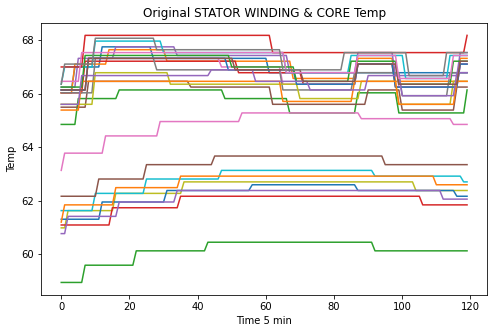

In [0]:
### PLOT ORIGINAL TEMPERATURE DATA ###

plt.figure(figsize=(8,5))
plt.plot(df[1])
plt.title('Original STATOR WINDING & CORE Temp')
plt.ylabel('Temp'); plt.xlabel('Time 5 min')
np.set_printoptions(False)

In [0]:
### LABEL DISTRIBUTION ###

label = label.Cooler
label.value_counts()